# CHM13 rDNA ARRAY ANNOTATION INFORMATION

rDNA array information does not exist in hg38 so this is unique to CHM13!

   Chromosome       Motif Type  Total Count  Total Bases Covered
0       chr13               DR        10475               440372
1       chr13               IR         7247               226792
2       chr13               MR         6382               955595
3       chr13  Negative_G_Quad         2057                85546
4       chr13  Positive_G_Quad         1296                54193
5       chr13                Z         2214                32461
6       chr14               DR         1958                78861
7       chr14               IR         1555                50734
8       chr14               MR         1247               174425
9       chr14  Negative_G_Quad          407                17231
10      chr14  Positive_G_Quad          278                11149
11      chr14                Z          501                 7526
12      chr15               DR         5842               240843
13      chr15               IR         4691               149413
14      chr15            

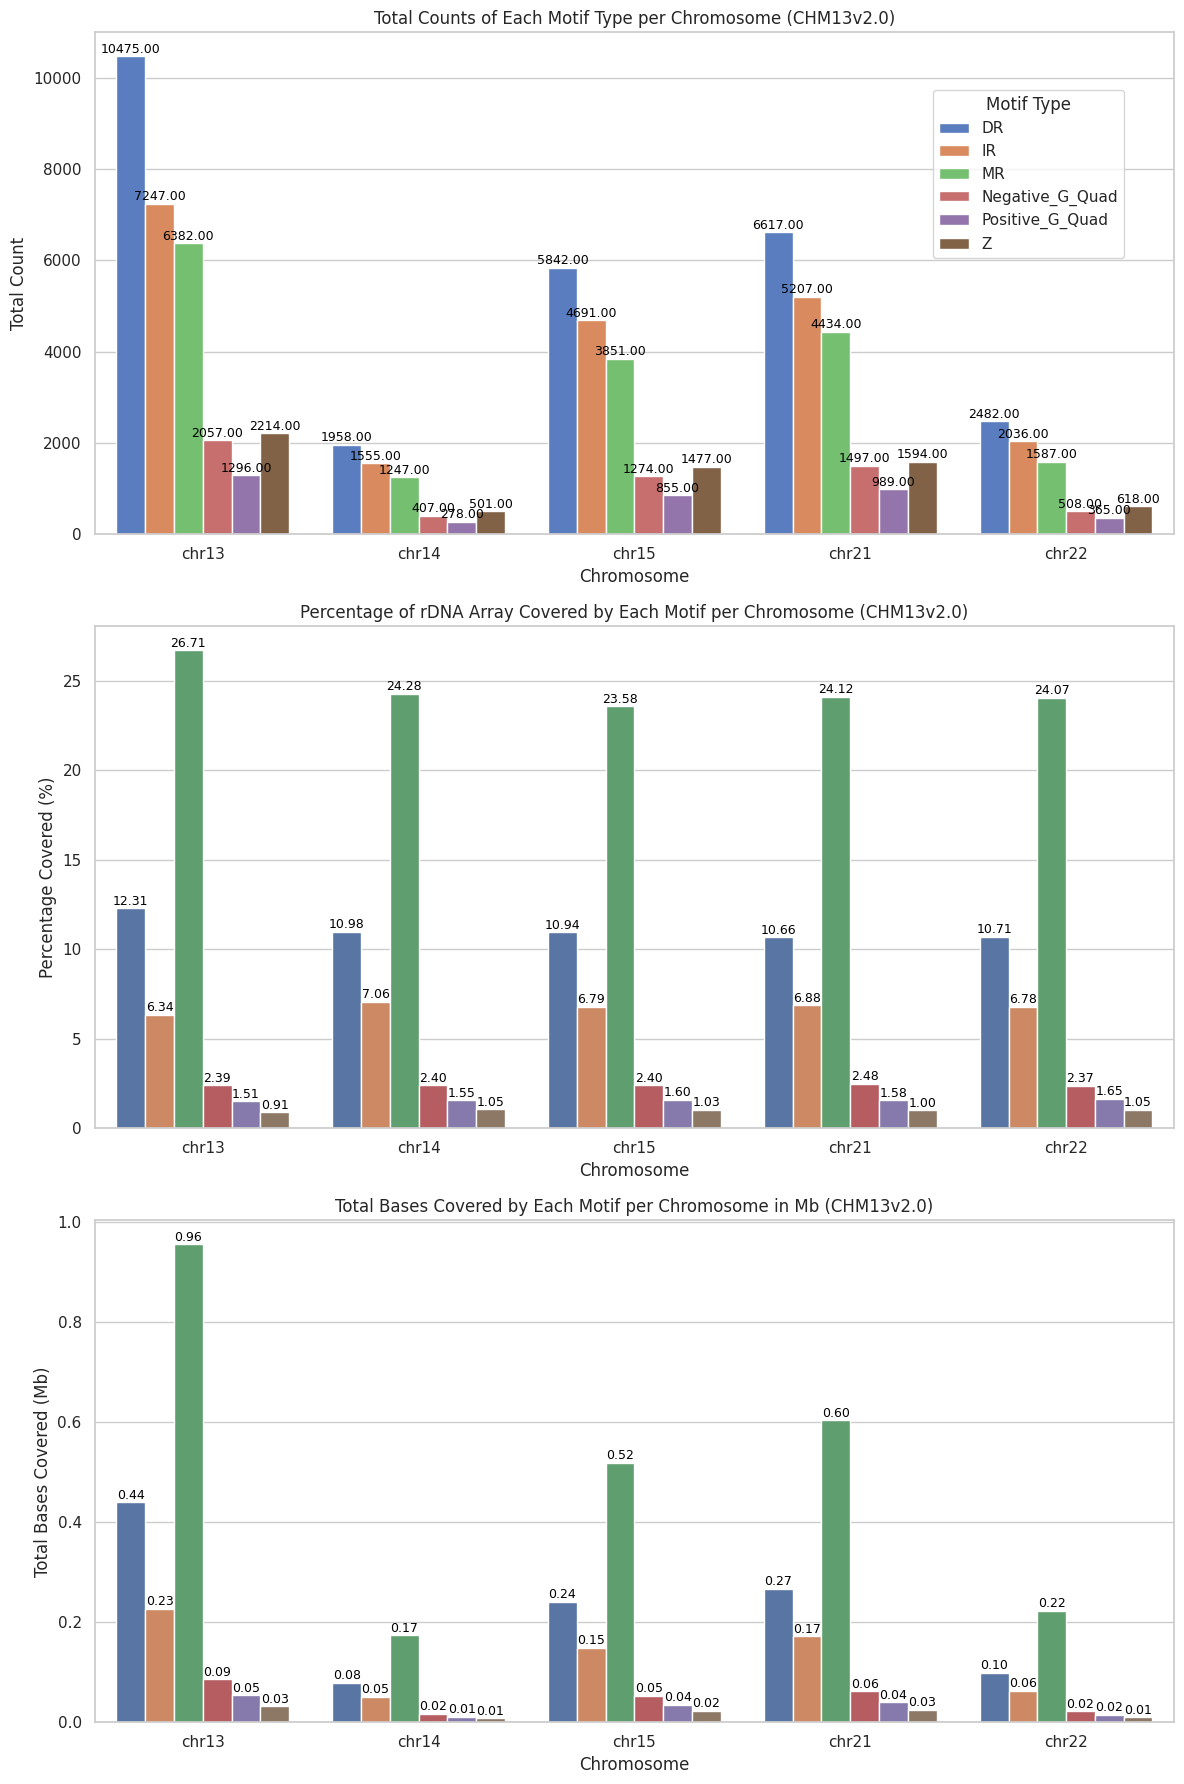

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the existing data from the CSV file
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/chm13ref_collapsed_summary_metrics_rdna_chr.csv'
data = pd.read_csv(file_path)

# Extract the chromosome information from the 'Sample_Haplotype_Chromosome' column
data['Chromosome'] = data['Sample_Haplotype_Chromosome'].apply(lambda x: x.split('|')[1].split('_')[0])

# Load the new CSV data
additional_data_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/chm13_quadron_collapsed_summary_metrics_rdna.csv'  # Replace with your actual file path
additional_data = pd.read_csv(additional_data_path)
additional_data['Chromosome'] = additional_data['Sample_Haplotype'].apply(lambda x: x.split('_')[0])

# Concatenate the existing data with the new data
full_data = pd.concat([data, additional_data], ignore_index=True)

# Group by Chromosome and Motif Type, then calculate the sum of counts and base coverage
grouped_data = full_data.groupby(['Chromosome', 'Motif Type']).agg({
    'Total Count': 'sum',
    'Total Bases Covered': 'sum'
}).reset_index()
print(grouped_data)
# Define the total lengths of the rDNA arrays for each chromosome
lengths = {
    'chr13': 3577493,
    'chr14': 718274,
    'chr15': 2201043,
    'chr21': 2504417,
    'chr22': 926856
}

# Calculate the percentage of rDNA array covered by each motif
grouped_data['Percentage of rDNA Covered'] = grouped_data.apply(
    lambda x: (x['Total Bases Covered'] / lengths[x['Chromosome']]) * 100, axis=1)

# Convert Total Bases Covered to megabases
grouped_data['Total Bases Covered (Mb)'] = grouped_data['Total Bases Covered'] / 1e6

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting figures
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Bar plot for the total counts
total_count_plot = sns.barplot(ax=ax1, x='Chromosome', y='Total Count', hue='Motif Type', data=grouped_data, palette='muted')
ax1.set_title('Total Counts of Each Motif Type per Chromosome (CHM13v2.0)')
ax1.set_xlabel('Chromosome')
ax1.set_ylabel('Total Count')

# Bar plot for the percentage of rDNA covered
percentage_cover_plot = sns.barplot(ax=ax2, x='Chromosome', y='Percentage of rDNA Covered', hue='Motif Type', data=grouped_data, palette='deep')
ax2.set_title('Percentage of rDNA Array Covered by Each Motif per Chromosome (CHM13v2.0)')
ax2.set_xlabel('Chromosome')
ax2.set_ylabel('Percentage Covered (%)')

# Bar plot for the total bases covered in Mb
total_bases_covered_plot = sns.barplot(ax=ax3, x='Chromosome', y='Total Bases Covered (Mb)', hue='Motif Type', data=grouped_data, palette='deep')
ax3.set_title('Total Bases Covered by Each Motif per Chromosome in Mb (CHM13v2.0)')
ax3.set_xlabel('Chromosome')
ax3.set_ylabel('Total Bases Covered (Mb)')

# Adjusting legends and annotations
for ax in [ax1, ax2, ax3]:
    for p in ax.patches:
        text = f'{p.get_height():.2f}'
        if p.get_height() > 0:
            ax.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
    ax.get_legend().remove()

# Create a single legend for all plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Motif Type', bbox_to_anchor=(0.95, 0.95))

plt.tight_layout()
plt.savefig('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/imgs/chm13_base_coverage_rdna.pdf', bbox_inches='tight')

plt.show()


# Haplotype aligned rDNA ARRAYS Analysis
NOTE: These are for rDNA arrays ALIGNED to CHM13...

Number of points assigned to each box:
Motif Type: DR, Points: 65
Motif Type: IR, Points: 65
Motif Type: MR, Points: 65
Motif Type: Z, Points: 65
Motif Type: Negative_G_Quad, Points: 65
Motif Type: Positive_G_Quad, Points: 65


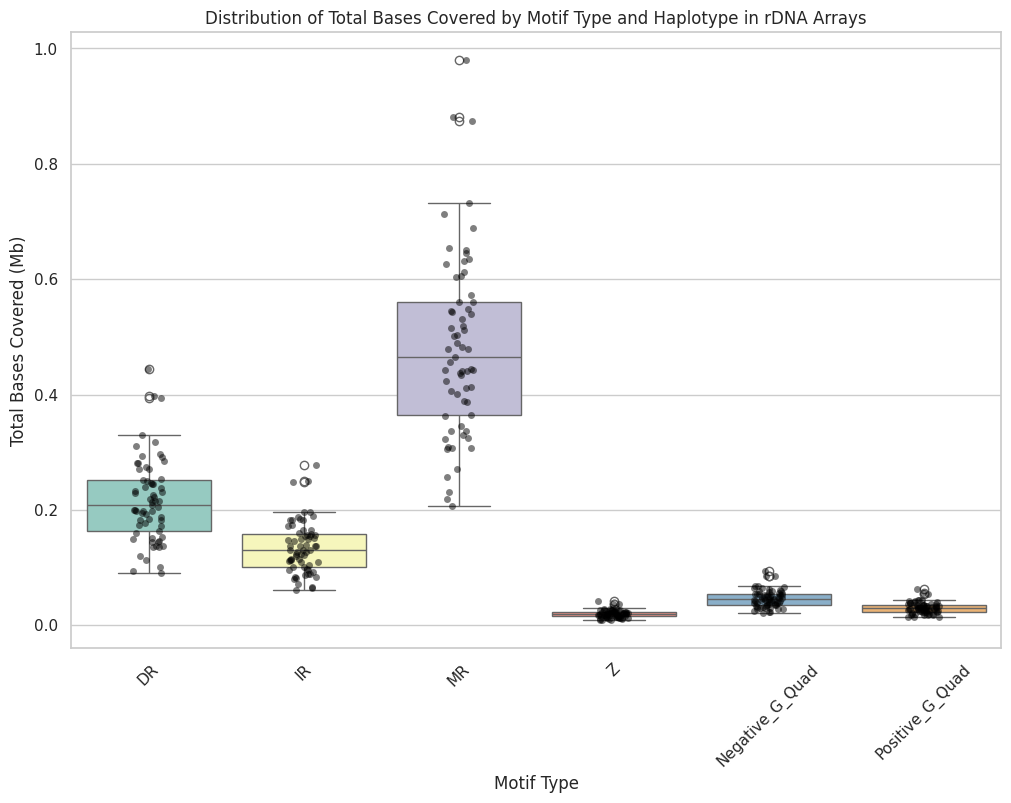

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/'
chromosomes = ['chr13', 'chr14', 'chr15', 'chr21', 'chr22']
data_list = []

# Load and concatenate all CSVs
for chromosome in chromosomes:
    # rDNA files
    rdna_path = os.path.join(base_path, f'verkko_batch123_chm13_collapsed_summary_metrics_rdna_{chromosome}.csv')
    rdna_df = pd.read_csv(rdna_path)
    
    # Extract haplotype info with a regex pattern to handle both HG and NA samples
    rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d|NA\d+_hap\d)')[0]
    if rdna_df['Sample_Haplotype'].isnull().all():
        # Attempt a more generic pattern if the specific one fails
        rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+|NA\d+)')[0]
    
    data_list.append(rdna_df[['Sample_Haplotype', 'Motif Type', 'Total Bases Covered']])
    
    # Quadron files
    quadron_path = os.path.join(base_path, f'verkko_batch123_chm13_quadron_collapsed_summary_metrics_rdna_{chromosome}.csv')
    quadron_df = pd.read_csv(quadron_path)
    data_list.append(quadron_df[['Sample_Haplotype', 'Motif Type', 'Total Bases Covered']])

# Concatenate all data frames in the list
data = pd.concat(data_list, ignore_index=True)

# Filter out entries with 'APR' motif type
data = data[data['Motif Type'] != 'APR']

# Sum the total bases covered for each haplotype and motif type
summed_data = data.groupby(['Sample_Haplotype', 'Motif Type']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Convert total bases covered to megabases
summed_data['Total Bases Covered (Mb)'] = summed_data['Total Bases Covered'] / 1e6

# Print the number of points assigned to each box
print("Number of points assigned to each box:")
for motif in summed_data['Motif Type'].unique():
    count = summed_data[summed_data['Motif Type'] == motif].shape[0]
    print(f"Motif Type: {motif}, Points: {count}")

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', data=summed_data, palette='Set3', dodge=False)
sns.stripplot(x='Motif Type', y='Total Bases Covered (Mb)', data=summed_data, color='black', jitter=True, alpha=0.5, dodge=False)
plt.title('Distribution of Total Bases Covered by Motif Type and Haplotype in rDNA Arrays')
plt.xlabel('Motif Type')
plt.ylabel('Total Bases Covered (Mb)')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

Number of sample points assigned to each box:
Motif Type: DR, Superpopulation: European Ancestry, Points: 7
Motif Type: DR, Superpopulation: East Asian Ancestry, Points: 10
Motif Type: DR, Superpopulation: American Ancestry, Points: 9
Motif Type: DR, Superpopulation: African Ancestry, Points: 29
Motif Type: DR, Superpopulation: South Asian Ancestry, Points: 8
Motif Type: IR, Superpopulation: European Ancestry, Points: 7
Motif Type: IR, Superpopulation: East Asian Ancestry, Points: 10
Motif Type: IR, Superpopulation: American Ancestry, Points: 9
Motif Type: IR, Superpopulation: African Ancestry, Points: 29
Motif Type: IR, Superpopulation: South Asian Ancestry, Points: 8
Motif Type: MR, Superpopulation: European Ancestry, Points: 7
Motif Type: MR, Superpopulation: East Asian Ancestry, Points: 10
Motif Type: MR, Superpopulation: American Ancestry, Points: 9
Motif Type: MR, Superpopulation: African Ancestry, Points: 29
Motif Type: MR, Superpopulation: South Asian Ancestry, Points: 8
Motif 

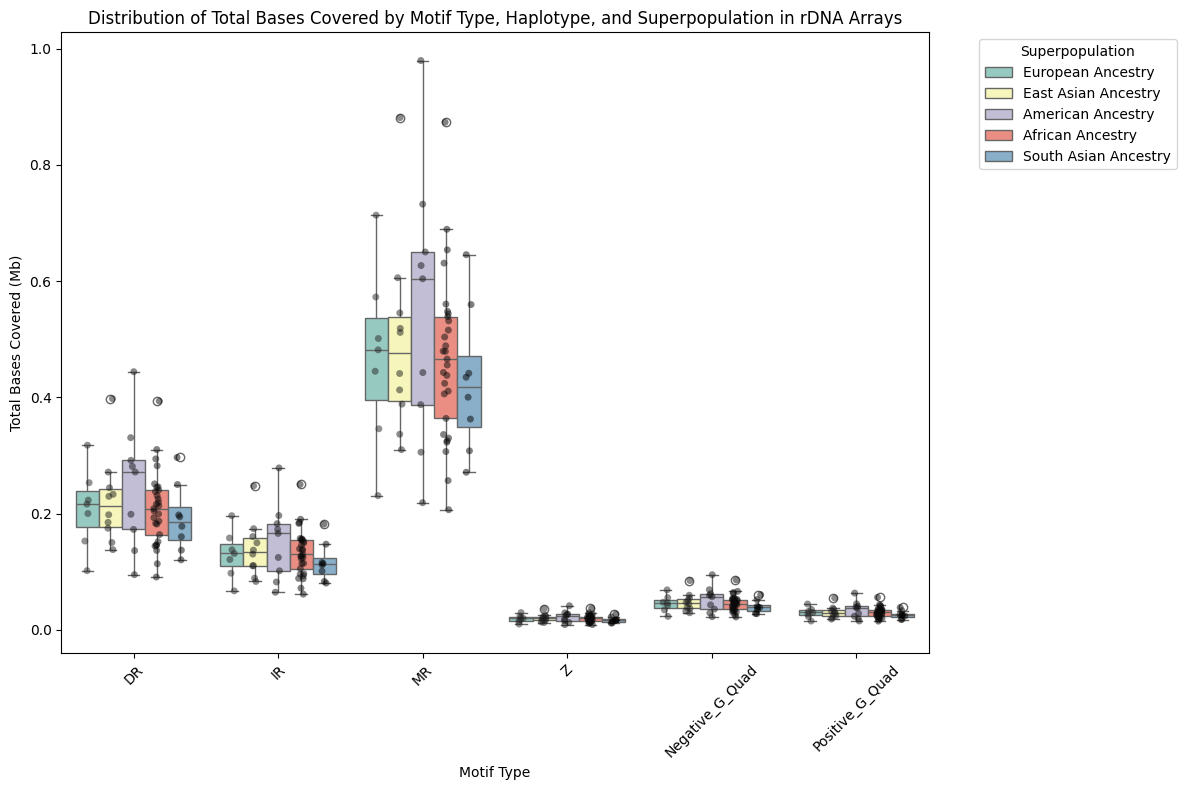

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Update this with the actual path to your metadata file
chromosomes = ['chr13', 'chr14', 'chr15', 'chr21', 'chr22']
data_list = []

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Load and concatenate all CSVs
for chromosome in chromosomes:
    # rDNA files
    rdna_path = os.path.join(base_path, f'verkko_batch123_chm13_collapsed_summary_metrics_rdna_{chromosome}.csv')
    rdna_df = pd.read_csv(rdna_path)
    
    # Updated regex to handle both HG and NA samples
    rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d|NA\d+_hap\d)')[0]
    if rdna_df['Sample_Haplotype'].isnull().all():
        rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+|NA\d+)')[0]
    rdna_df['Sample'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+|NA\d+)')[0]
    data_list.append(rdna_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered']])
    
    # Quadron files
    quadron_path = os.path.join(base_path, f'verkko_batch123_chm13_quadron_collapsed_summary_metrics_rdna_{chromosome}.csv')
    quadron_df = pd.read_csv(quadron_path)
    
    # Update the regex for Sample extraction
    quadron_df['Sample'] = quadron_df['Sample_Haplotype'].str.extract(r'(HG\d+|NA\d+)')[0]
    
    data_list.append(quadron_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered']])

# Concatenate all data frames in the list
data = pd.concat(data_list, ignore_index=True)

# Filter out entries with 'APR' motif type
data = data[data['Motif Type'] != 'APR']

# Merge metadata with the data
merged_data = pd.merge(data, metadata_df[['Sample name', 'Superpopulation name']], left_on='Sample', right_on='Sample name', how='left')

# Sum the total bases covered for each haplotype, motif type, and superpopulation
summed_data = merged_data.groupby(['Sample_Haplotype', 'Motif Type', 'Superpopulation name']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Convert total bases covered to megabases
summed_data['Total Bases Covered (Mb)'] = summed_data['Total Bases Covered'] / 1e6

# Print the number of sample points assigned to each box
print("Number of sample points assigned to each box:")
for motif in summed_data['Motif Type'].unique():
    for superpop in summed_data['Superpopulation name'].unique():
        count = summed_data[(summed_data['Motif Type'] == motif) & (summed_data['Superpopulation name'] == superpop)].shape[0]
        print(f"Motif Type: {motif}, Superpopulation: {superpop}, Points: {count}")

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Superpopulation name', data=summed_data, palette='Set3', dodge=True)
sns.stripplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Superpopulation name', data=summed_data, palette='dark:black', jitter=True, alpha=0.5, dodge=True, legend=False)

# Remove duplicate entries in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Superpopulation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Total Bases Covered by Motif Type, Haplotype, and Superpopulation in rDNA Arrays')
plt.xlabel('Motif Type')
plt.ylabel('Total Bases Covered (Mb)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

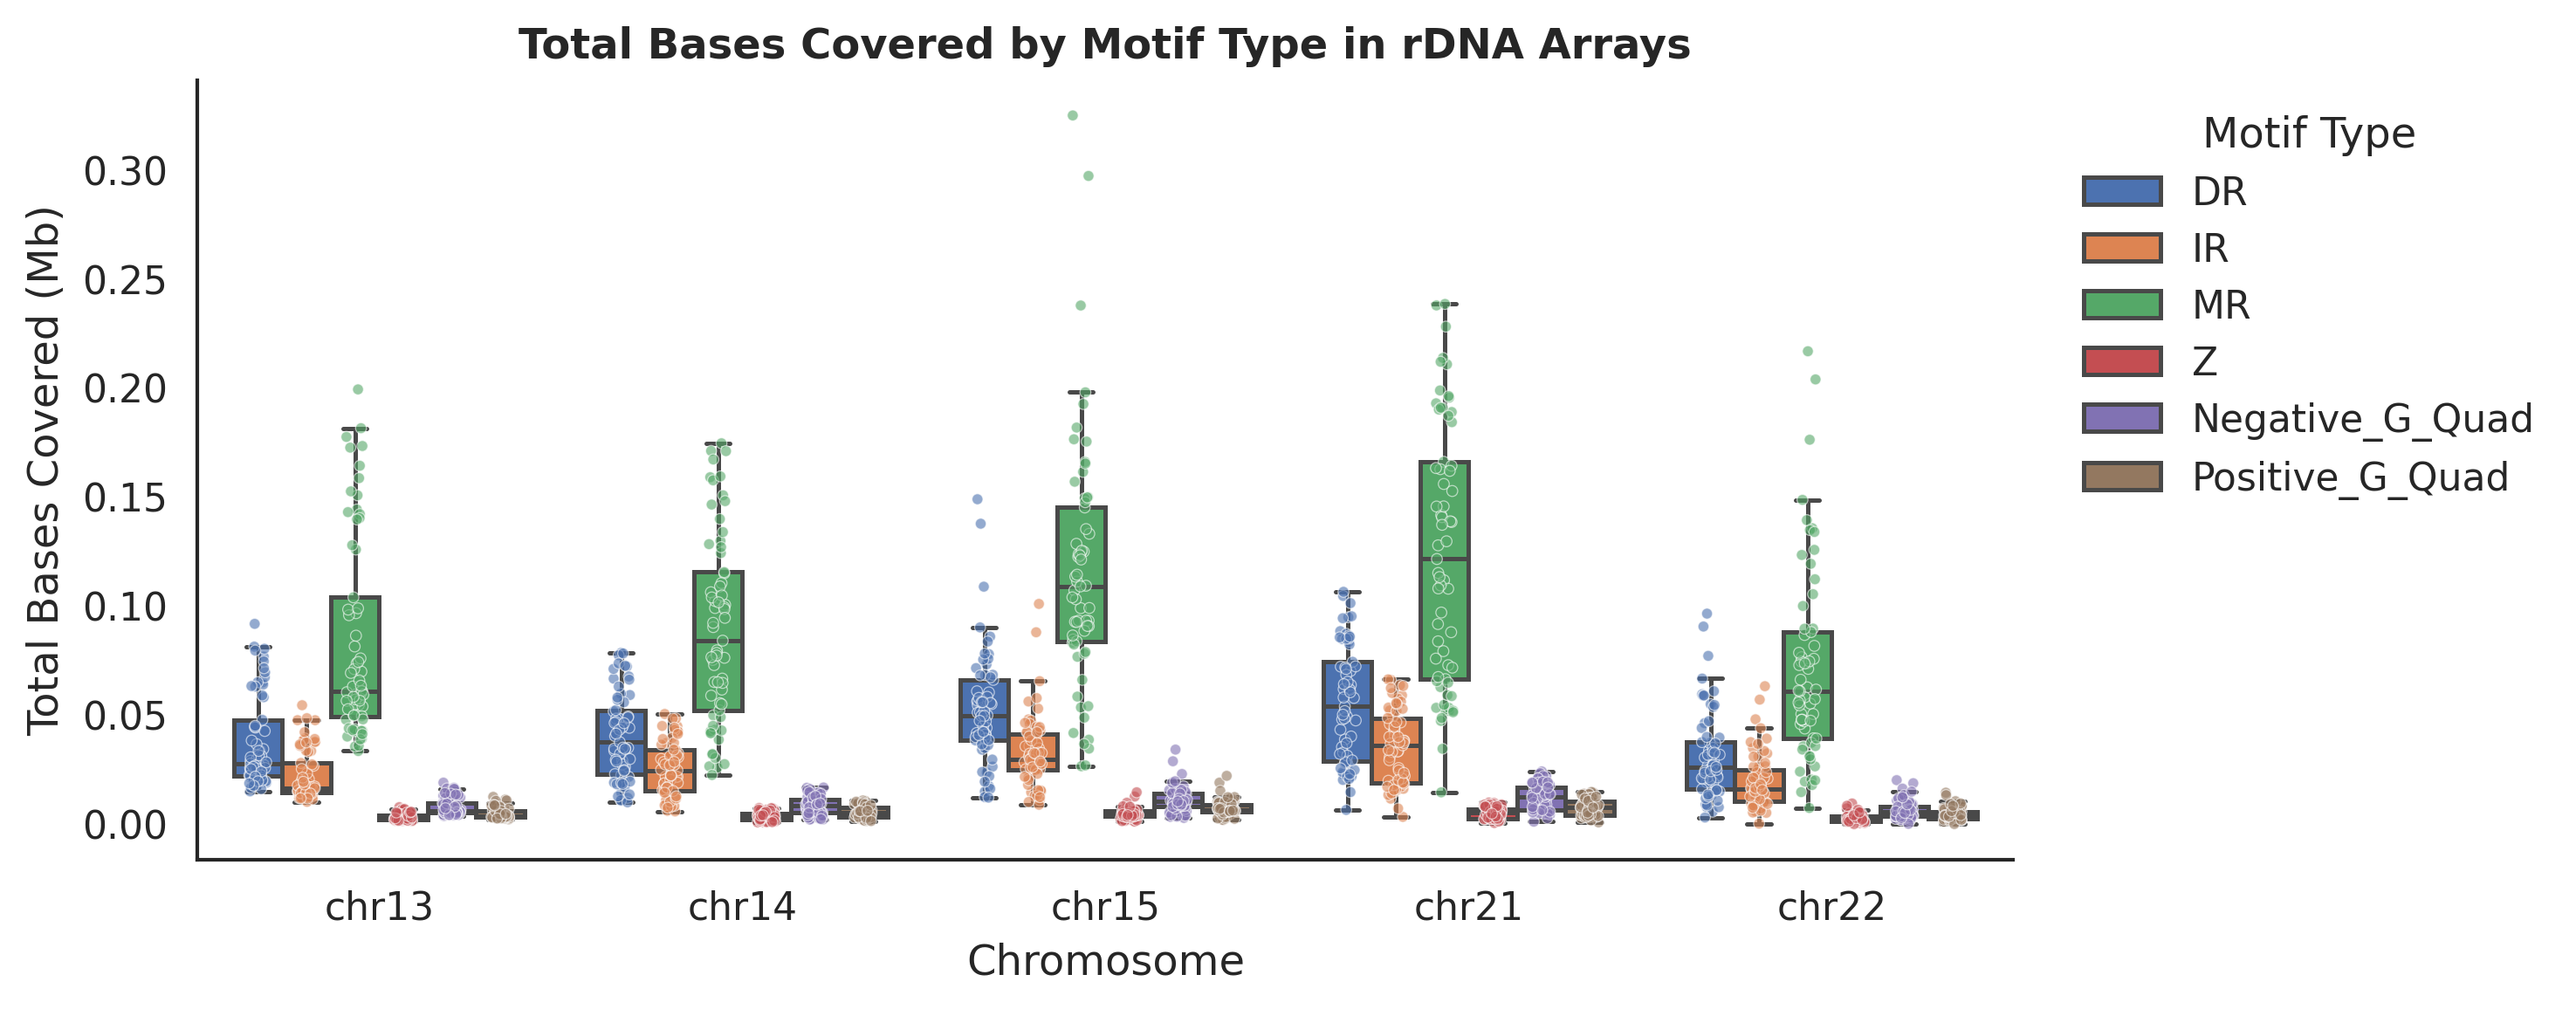

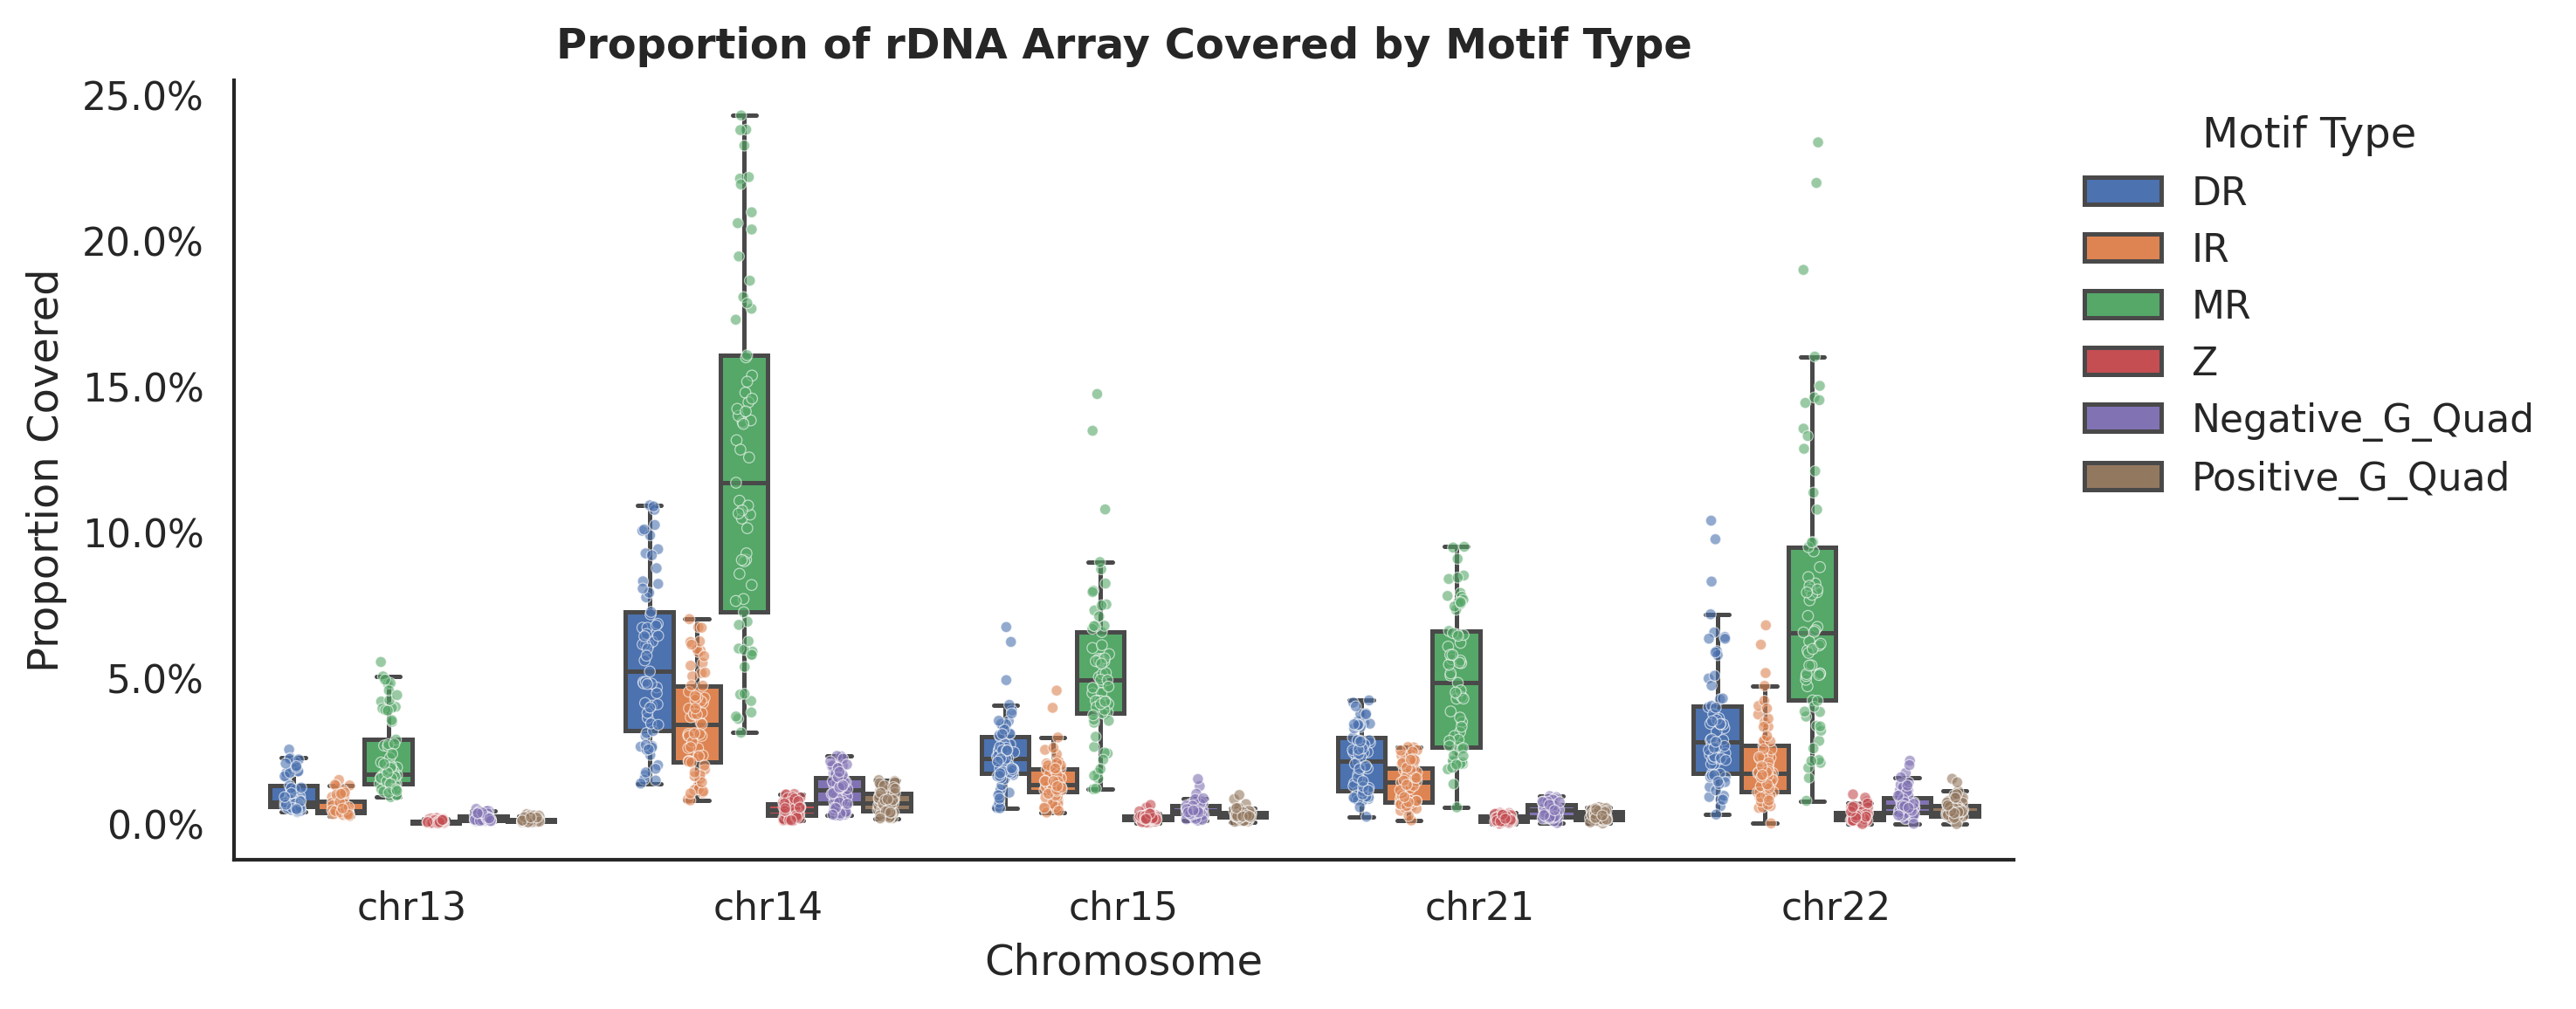

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import os

# ---------------- Appearance defaults (no gridlines) ----------------
sns.set_theme(style="white", context="paper", font_scale=1.2)  # 'white' removes the default grid
plt.rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "axes.titleweight": "semibold",
    "axes.labelweight": "regular",
    "axes.spines.top": False,
    "axes.spines.right": False
})

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/'
metadata_path = '/home/alextu/scratch/igsr_samples.tsv'
chromosomes_of_interest = ['chr13', 'chr14', 'chr15', 'chr21', 'chr22']
data_list = []

# rDNA array lengths
lengths = {
    'chr13': 3577493,
    'chr14': 718274,
    'chr15': 2201043,
    'chr21': 2504417,
    'chr22': 926856
}

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Load CSVs
for chromosome in chromosomes_of_interest:
    # rDNA files
    rdna_path = os.path.join(base_path, f'verkko_batch123_chm13_collapsed_summary_metrics_rdna_{chromosome}.csv')
    rdna_df = pd.read_csv(rdna_path)
    rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d|NA\d+_hap\d)')[0]
    rdna_df['Chromosome'] = chromosome
    if rdna_df['Sample_Haplotype'].isnull().all():
        rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+|NA\d+)')[0]
    rdna_df['Sample'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+|NA\d+)')[0]
    data_list.append(rdna_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered', 'Chromosome']])

    # Quadron files
    quadron_path = os.path.join(base_path, f'verkko_batch123_chm13_quadron_collapsed_summary_metrics_rdna_{chromosome}.csv')
    quadron_df = pd.read_csv(quadron_path)
    quadron_df['Sample'] = quadron_df['Sample_Haplotype'].str.extract(r'(HG\d+|NA\d+)')[0]
    quadron_df['Chromosome'] = chromosome
    data_list.append(quadron_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered', 'Chromosome']])

# Concatenate
data = pd.concat(data_list, ignore_index=True)
data = data[data['Motif Type'] != 'APR']  # remove APR motif type

# Merge metadata
merged_data = pd.merge(
    data,
    metadata_df[['Sample name', 'Superpopulation name']],
    left_on='Sample', right_on='Sample name', how='left'
)

# Summarize
summed_data = (
    merged_data
    .groupby(['Sample_Haplotype', 'Motif Type', 'Chromosome'], as_index=False)
    .agg({'Total Bases Covered': 'sum'})
)
summed_data['Total Bases Covered (Mb)'] = summed_data['Total Bases Covered'] / 1e6
summed_data['rDNA Array Length'] = summed_data['Chromosome'].map(lengths)
summed_data['Proportion Covered'] = summed_data['Total Bases Covered'] / summed_data['rDNA Array Length']

# Legend helper
def dedupe_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),
              title='Motif Type', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# ---------------- Plot 1: Total Bases Covered (Mb) ----------------
fig1 = plt.figure(figsize=(10, 4))
ax1 = sns.boxplot(
    x='Chromosome', y='Total Bases Covered (Mb)', hue='Motif Type',
    data=summed_data, dodge=True, showfliers=False, linewidth=1.2, saturation=1
)
sns.stripplot(
    x='Chromosome', y='Total Bases Covered (Mb)', hue='Motif Type',
    data=summed_data, dodge=True, jitter=0.15, alpha=0.6, size=3,
    linewidth=0.3, edgecolor="white", legend=False
)
ax1.set_title('Total Bases Covered by Motif Type in rDNA Arrays')
ax1.set_xlabel('Chromosome')
ax1.set_ylabel('Total Bases Covered (Mb)')
plt.xticks(rotation=0)
ax1.grid(False)  # remove gridlines
dedupe_legend(ax1)
plt.tight_layout()
plt.savefig('rdna_total_bases_by_motif_chr.png')
plt.savefig('rdna_total_bases_by_motif_chr.pdf')
plt.show()

# ---------------- Plot 2: Proportion Covered ----------------
fig2 = plt.figure(figsize=(10, 4))
ax2 = sns.boxplot(
    x='Chromosome', y='Proportion Covered', hue='Motif Type',
    data=summed_data, dodge=True, showfliers=False, linewidth=1.2, saturation=1
)
sns.stripplot(
    x='Chromosome', y='Proportion Covered', hue='Motif Type',
    data=summed_data, dodge=True, jitter=0.15, alpha=0.6, size=3,
    linewidth=0.3, edgecolor="white", legend=False
)
ax2.set_title('Proportion of rDNA Array Covered by Motif Type')
ax2.set_xlabel('Chromosome')
ax2.set_ylabel('Proportion Covered')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.grid(False)  # remove gridlines
plt.xticks(rotation=0)
dedupe_legend(ax2)
plt.tight_layout()
plt.savefig('rdna_proportion_by_motif_chr.png')
plt.savefig('rdna_proportion_by_motif_chr.pdf')
plt.show()

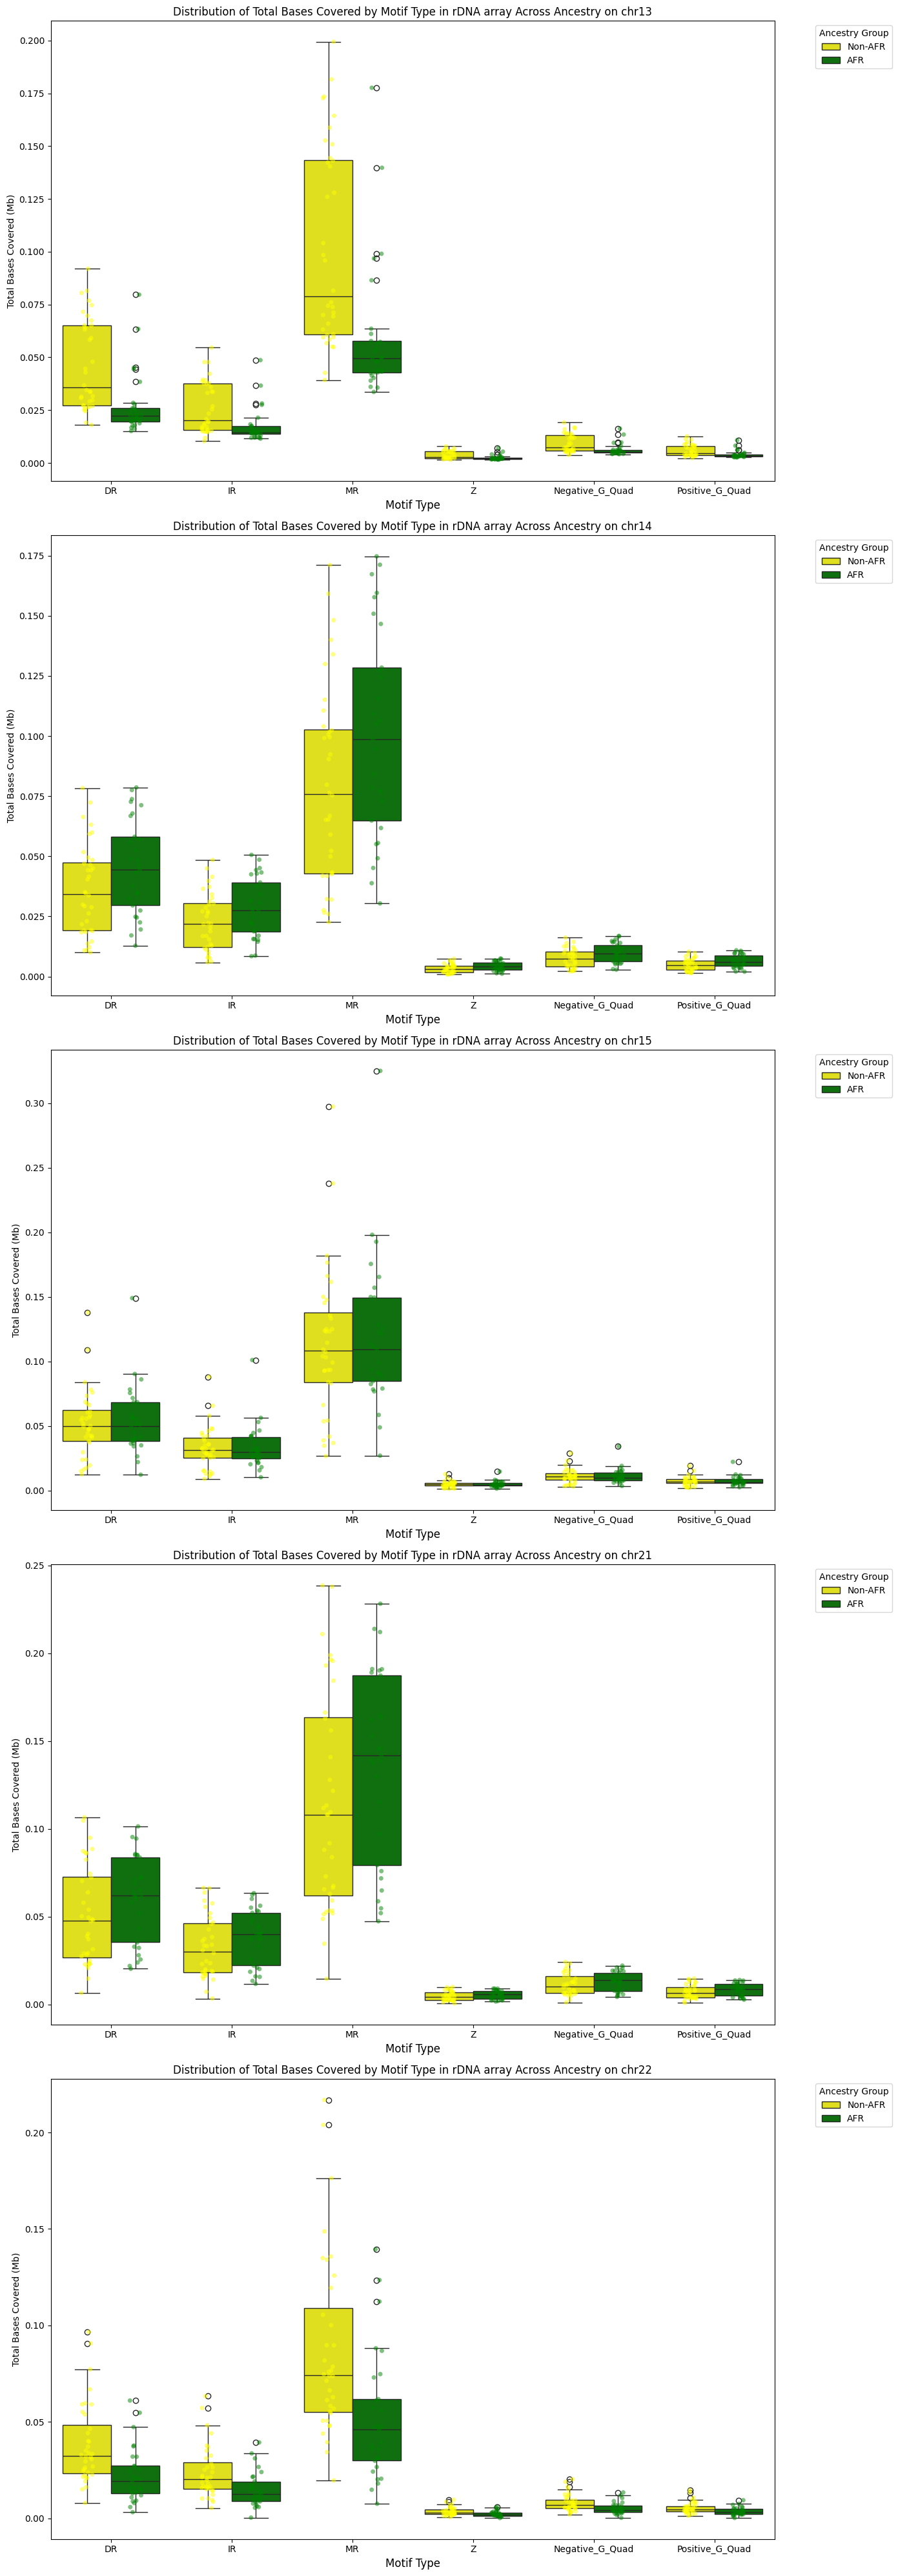

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
base_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/rdna_annotation_summary_stats_v2/'
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'  # Path to your metadata file
chromosomes_of_interest = ['chr13', 'chr14', 'chr15', 'chr21', 'chr22']
data_list = []

# Load metadata
metadata_df = pd.read_csv(metadata_path, delimiter='\t')

# Load and concatenate all CSVs
for chromosome in chromosomes_of_interest:
    # rDNA files
    rdna_path = os.path.join(base_path, f'verkko_batch123_chm13_collapsed_summary_metrics_rdna_{chromosome}.csv')
    rdna_df = pd.read_csv(rdna_path)
    
    # Update the regex to handle both HG and NA samples
    rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+_hap\d|NA\d+_hap\d)')[0]
    rdna_df['Chromosome'] = chromosome
    if rdna_df['Sample_Haplotype'].isnull().all():
        rdna_df['Sample_Haplotype'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+|NA\d+)')[0]
    rdna_df['Sample'] = rdna_df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+|NA\d+)')[0]
    data_list.append(rdna_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered', 'Chromosome']])
    
    # Quadron files
    quadron_path = os.path.join(base_path, f'verkko_batch123_chm13_quadron_collapsed_summary_metrics_rdna_{chromosome}.csv')
    quadron_df = pd.read_csv(quadron_path)
    
    # Update the regex for Sample extraction
    quadron_df['Sample'] = quadron_df['Sample_Haplotype'].str.extract(r'(HG\d+|NA\d+)')[0]
    quadron_df['Chromosome'] = chromosome
    data_list.append(quadron_df[['Sample_Haplotype', 'Sample', 'Motif Type', 'Total Bases Covered', 'Chromosome']])

# Concatenate all data frames in the list
data = pd.concat(data_list, ignore_index=True)

# Filter out entries with 'APR' motif type
data = data[data['Motif Type'] != 'APR']

# Merge metadata with the data
merged_data = pd.merge(data, metadata_df[['Sample name', 'Superpopulation code']], 
                        left_on='Sample', right_on='Sample name', how='left')

# Create a new column to group samples by AFR and Non-AFR
merged_data['Ancestry Group'] = merged_data['Superpopulation code'].apply(lambda x: 'AFR' if x == 'AFR' else 'Non-AFR')

# Sum the total bases covered for each haplotype, motif type, chromosome, and ancestry group
summed_data = merged_data.groupby(['Sample_Haplotype', 'Motif Type', 'Chromosome', 'Ancestry Group']).agg({'Total Bases Covered': 'sum'}).reset_index()

# Convert total bases covered to megabases
summed_data['Total Bases Covered (Mb)'] = summed_data['Total Bases Covered'] / 1e6

# Plotting
fig, axes = plt.subplots(nrows=len(chromosomes_of_interest), figsize=(14, 8 * len(chromosomes_of_interest)))

# Define custom color palette for AFR and Non-AFR
palette = {'AFR': 'green', 'Non-AFR': 'yellow'}

for ax, chromosome in zip(axes, chromosomes_of_interest):
    sns.boxplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Ancestry Group', 
                data=summed_data[summed_data['Chromosome'] == chromosome], 
                palette=palette, dodge=True, ax=ax)
    sns.stripplot(x='Motif Type', y='Total Bases Covered (Mb)', hue='Ancestry Group', 
                  data=summed_data[summed_data['Chromosome'] == chromosome], 
                  palette=palette, jitter=True, alpha=0.5, dodge=True, ax=ax, legend=False)
    ax.set_title(f'Distribution of Total Bases Covered by Motif Type in rDNA array Across Ancestry on {chromosome}')
    ax.set_xlabel('Motif Type')
    ax.set_ylabel('Total Bases Covered (Mb)')
    ax.legend(title='Ancestry Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the X-axis label for all plots
for ax in axes:
    ax.set_xlabel('Motif Type', fontsize=12)

plt.tight_layout()
plt.show()

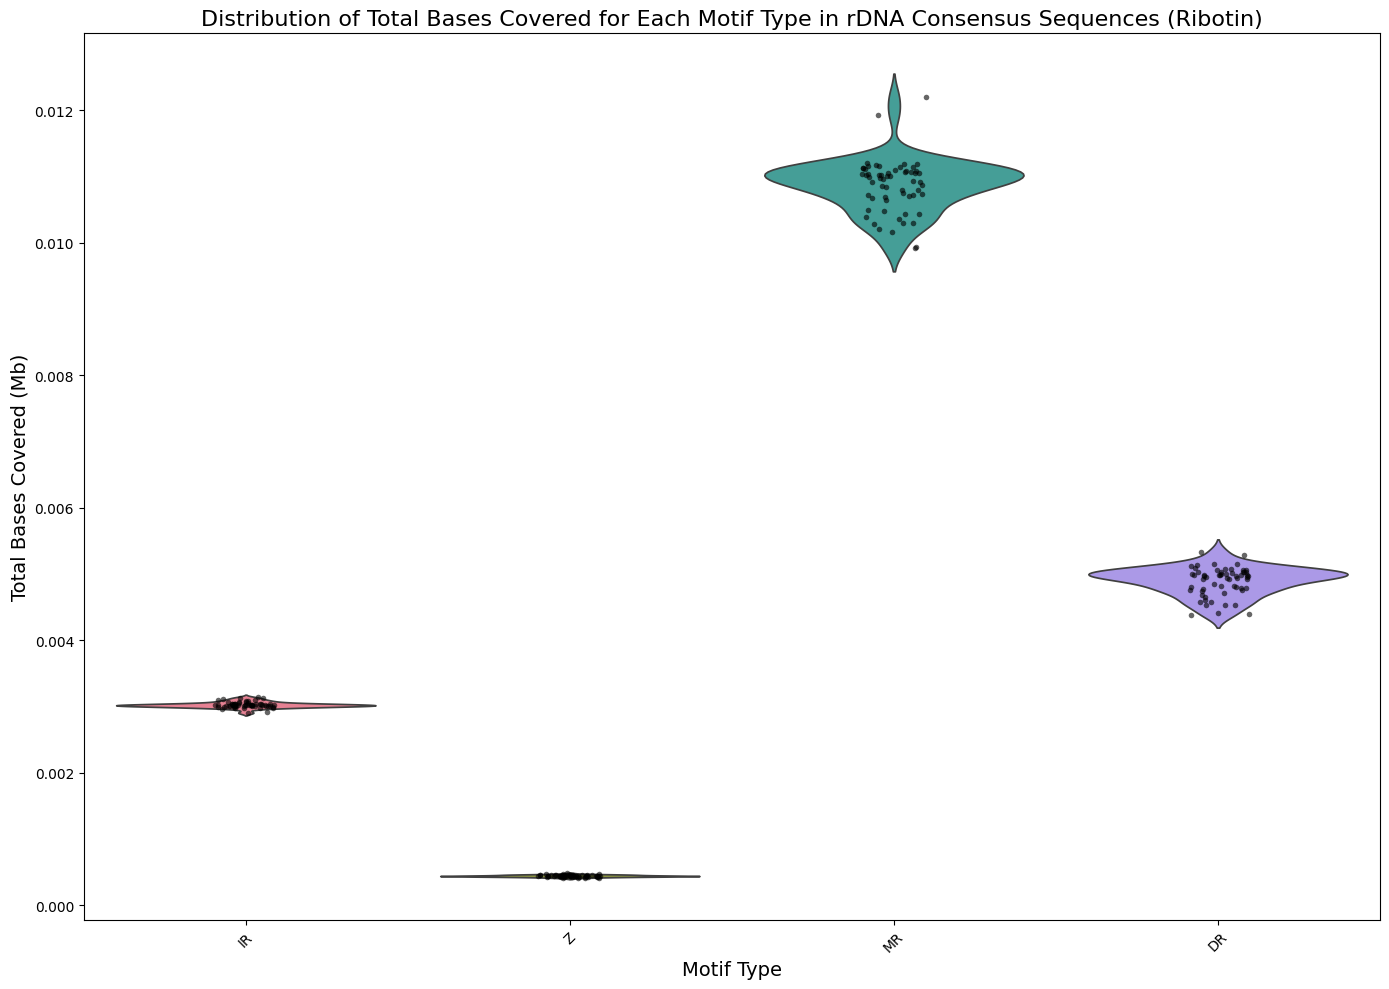

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/verkko_batch123_chm13_collapsed_summary_metrics_rdna_consensus_ribton.csv'
df = pd.read_csv(file_path)

# Convert 'Total Bases Covered' to megabases
df['Total Bases Covered (Mb)'] = df['Total Bases Covered'] / 1e6

# Set the color palette for motif types
palette = sns.color_palette("husl", n_colors=df['Motif Type'].nunique())

# Create a violin plot with a strip plot overlay
plt.figure(figsize=(14, 10))
sns.violinplot(data=df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Motif Type', dodge=False, palette=palette, inner=None, legend=False)
sns.stripplot(data=df, x='Motif Type', y='Total Bases Covered (Mb)', color='k', alpha=0.6, jitter=True, size=4)

# Customize the plot
plt.title('Distribution of Total Bases Covered for Each Motif Type in rDNA Consensus Sequences (Ribotin)', fontsize=16)
plt.xlabel('Motif Type', fontsize=14)
plt.ylabel('Total Bases Covered (Mb)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

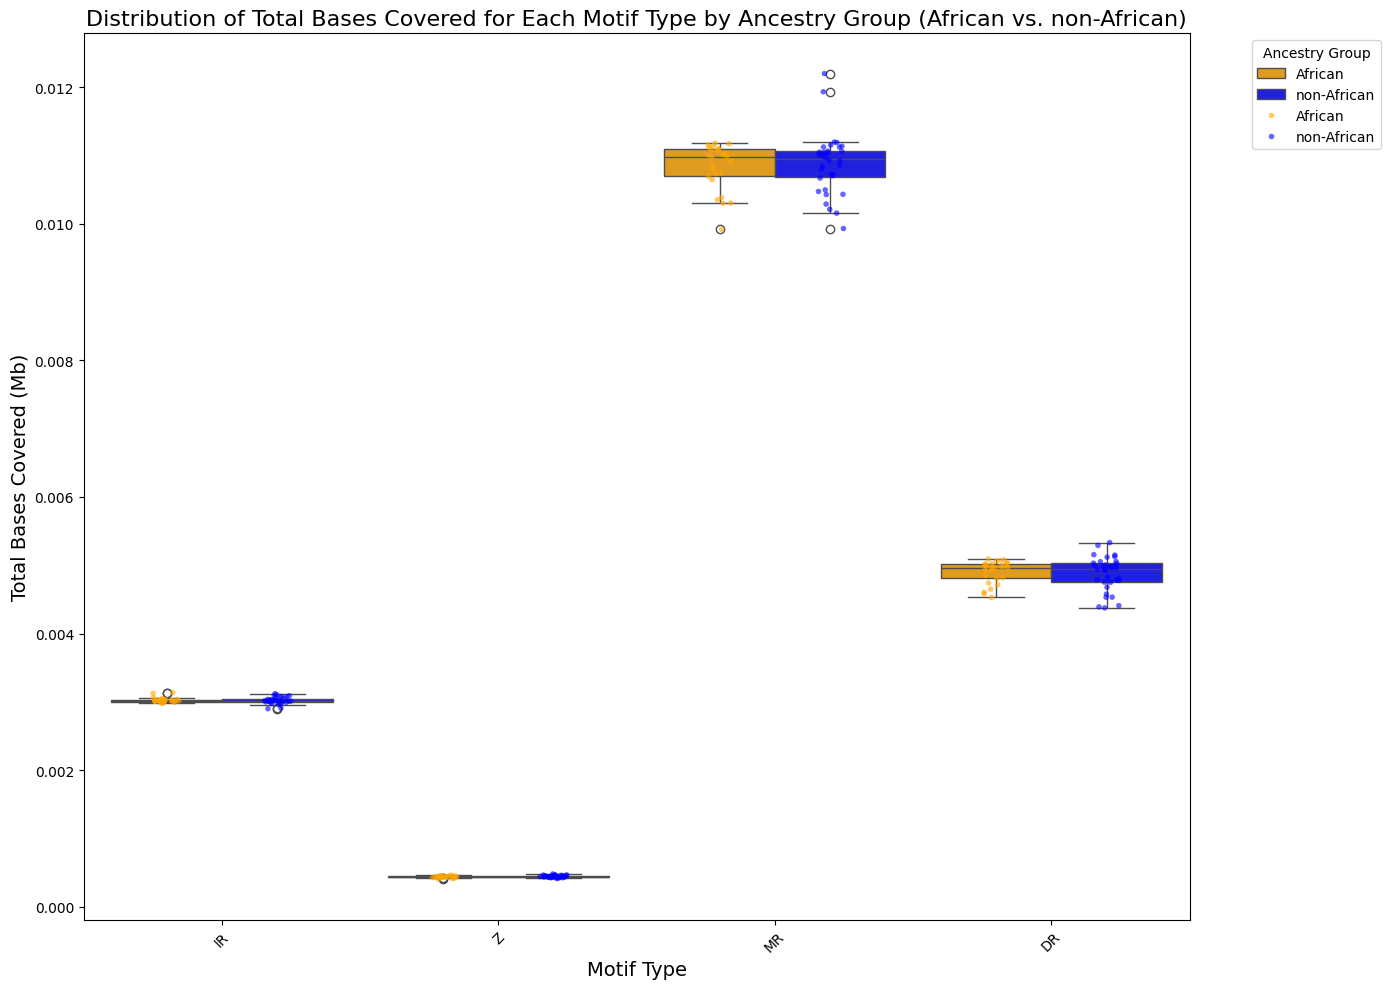

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the main data from the CSV file
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/rdna_annotation_summary_stats/verkko_batch123_chm13_collapsed_summary_metrics_rdna_consensus_ribton.csv'
df = pd.read_csv(file_path)

# Extract sample names from 'Sample_Haplotype_Chromosome' column (if applicable)
df['Sample'] = df['Sample_Haplotype_Chromosome'].str.extract(r'(HG\d+|NA\d+)')[0]

# Load metadata
metadata_path = '/home/alextu/scratch/igsr_sample_metadata/igsr_samples.tsv'
metadata_df = pd.read_csv(metadata_path, delimiter='\t')
metadata_df['Sample name'] = metadata_df['Sample name'].str.upper().str.strip()

# Merge the main DataFrame with the metadata on sample names
merged_df = pd.merge(df, metadata_df[['Sample name', 'Superpopulation code']], left_on='Sample', right_on='Sample name', how='left')

# Create a new column to group by 'African' and 'non-African'
merged_df['Ancestry Group'] = merged_df['Superpopulation code'].apply(lambda x: 'African' if x == 'AFR' else 'non-African')

# Convert 'Total Bases Covered' to megabases
merged_df['Total Bases Covered (Mb)'] = merged_df['Total Bases Covered'] / 1e6

# Set the color palette
palette = {'African': 'orange', 'non-African': 'blue'}

# Create a violin plot with a strip plot overlay, grouped by AFR vs. non-African
plt.figure(figsize=(14, 10))
sns.boxplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Ancestry Group', dodge=True, palette=palette)
sns.stripplot(data=merged_df, x='Motif Type', y='Total Bases Covered (Mb)', hue='Ancestry Group', dodge=True, jitter=True, size=4, marker='o', alpha=0.6, palette=palette)

# Customize the plot
plt.title('Distribution of Total Bases Covered for Each Motif Type by Ancestry Group (African vs. non-African)', fontsize=16)
plt.xlabel('Motif Type', fontsize=14)
plt.ylabel('Total Bases Covered (Mb)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Ancestry Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()